# TASK: Build a ML model to predict startup's profit based on various expenses.
Suppose you are part of the finance team for a growing startup that is looking to expand operations. The management wants to predict future profits based on spending in R&D, Administration, and Marketing. Your task is to create a financial model that helps the startup optimize its spending while maximizing profit. This will help the company make informed investment decisions in different departments.





Import Libraries and Load Dataset


In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [18]:
# Loading the dataset without the 'State' column
file_path = '/content/50_Startups_ES.csv'  # Adjust this path if needed
df = pd.read_csv(file_path)



In [19]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
      R&D Spend  Administration  Marketing Spend         Profit
0   8322.458934    82067.853030     13805.572800    7200.733440
1  91749.160000   114175.790000    294919.570000  124266.900000
2  90321.525175   114469.403767    157211.920789   91428.668369
3  46150.944402   124136.651891    123550.384931   41399.986604
4  20888.413200    93591.988220    218885.921309   36717.063063


Exploratory Data Analysis (EDA)


In [20]:
# Checking for null values
print("\nNull values in each column:")
print(df.isnull().sum())

# Summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())





Null values in each column:
R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

Summary statistics:
           R&D Spend  Administration  Marketing Spend         Profit
count     150.000000      150.000000       150.000000     150.000000
mean    70543.755949   121761.256614    216315.886438   81290.054085
std     43042.345041    27066.686974    128895.999493   42775.140669
min    -46530.596086    51283.140000   -185350.492363  -33774.326782
25%     44585.377372    99917.684604    130353.584778   53381.744560
50%     69414.643505   123148.890623    220299.364104   79137.308523
75%     97091.790732   139383.485985    299469.085000  105703.532077
max    165349.200000   197557.802771    682176.828935  192261.830000


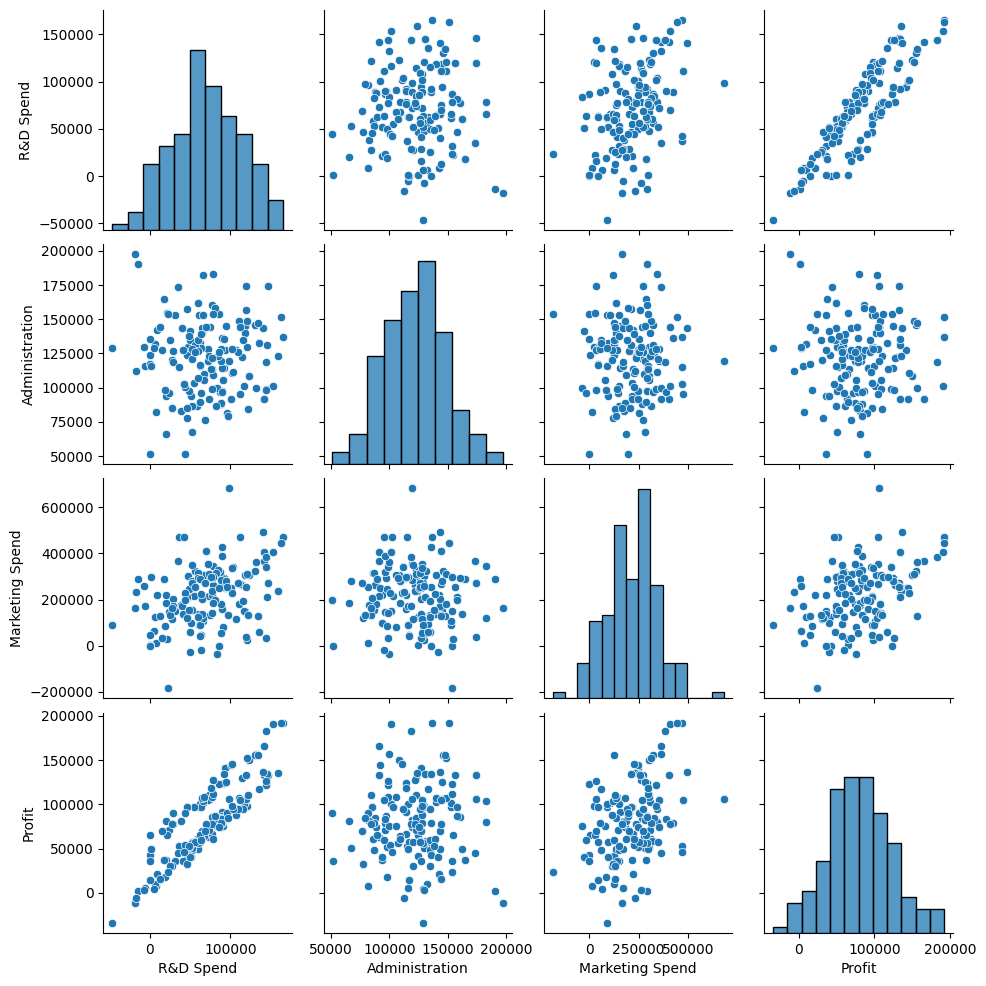

In [21]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()




Correlation Heatmap helps identify which features have the strongest relationships with the target variable ("Profit").


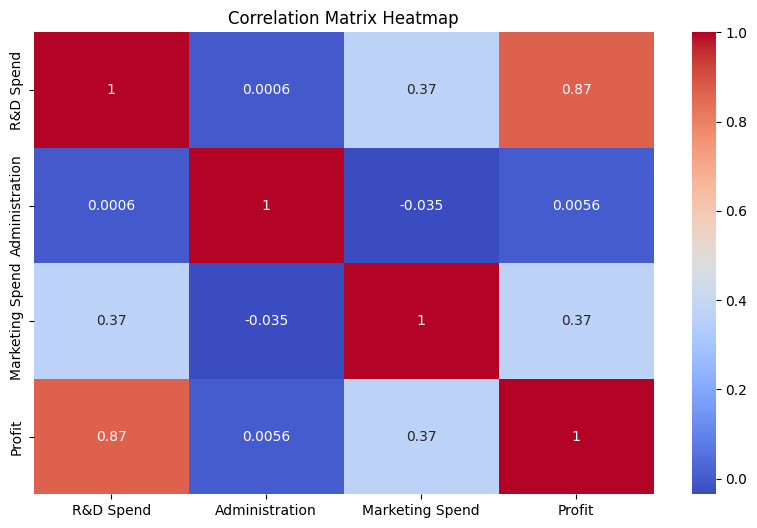

In [22]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Data Preprocessing


We split the data into features (X) and target (y), and then split these into training and testing sets. We do so to evaluate the model on unseen data.

We create and train a multiple linear regression model using the training set and display the coefficients to understand the impact of each feature on "Profit."

We can change Train/Test ratio too. Try 70:30 next


# Trying 70:30

In [23]:
# Splitting the data into features (X) and target (y)
X = df.drop('Profit', axis=1)  # All columns except 'Profit' are features
y = df['Profit']               # 'Profit' is the target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Displaying the coefficients
print("Model Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

intercept = model.intercept_
print(f"Intercept (β0): {intercept}")

Model Coefficients:
                 Coefficient
R&D Spend           0.880020
Administration     -0.003976
Marketing Spend     0.006969
Intercept (β0): 18408.481054290518


In [24]:
# Splitting the data into features (X) and target (y)
X = df.drop('Profit', axis=1)  # All columns except 'Profit' are features
y = df['Profit']               # 'Profit' is the target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Displaying the coefficients
print("Model Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

intercept = model.intercept_
print(f"Intercept (β0): {intercept}")



Model Coefficients:
                 Coefficient
R&D Spend           0.845081
Administration      0.021114
Marketing Spend     0.015938
Intercept (β0): 15530.085654485796


coefficients represent the positie or negative relation and the intensity.

The coefficients indicate the expected change in "Profit" for a one-unit change in each feature, assuming other features remain constant.


Also, the intercept is implicitly included in the linear regression model by default.


In [25]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 20039.45507172663
R-squared: 0.7733120881784735


R-squared of 0.77 means the model explains about 77% of the variance in "Profit"

Higher values indicate a better fit.



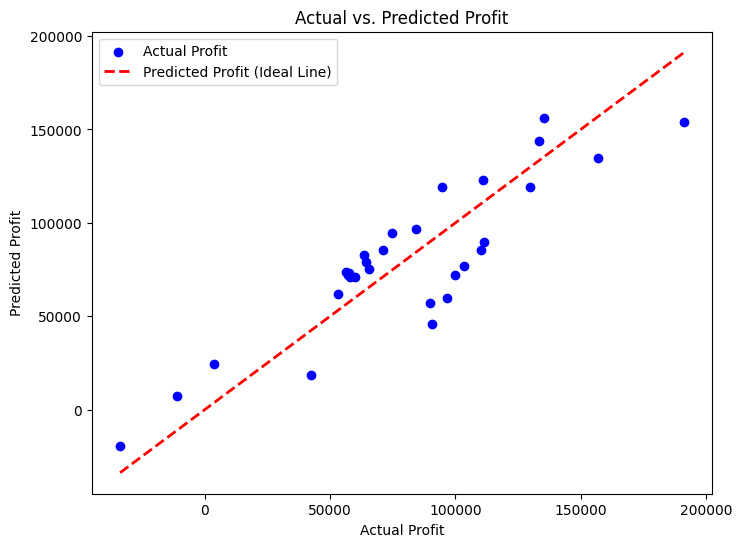

In [26]:
# Plotting actual vs. predicted values with enhanced labeling and legend
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual Profit')  # Blue dots for actual profit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Predicted Profit (Ideal Line)')  # Red dashed line for predicted profit
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit')
plt.legend()  # Adds a legend to clarify colors
plt.show()


Points should ideally lie close to the red line, indicating accurate predictions.


# Slider
Interact with the sliders to input different values for R&D Spend, Administration, and Marketing Spend. The model will predict the profit based on these inputs.



In [27]:
# Install ipywidgets (if not already installed)
!pip install ipywidgets

# Import ipywidgets for interactive components
from ipywidgets import interact, FloatSlider, HBox, VBox, widgets

# Define a function to make predictions interactively
def predict_profit_interactive(rd_spend, administration, marketing_spend):
    # Create a DataFrame with input values
    input_data = pd.DataFrame({
        'R&D Spend': [rd_spend],
        'Administration': [administration],
        'Marketing Spend': [marketing_spend]
    })

    # Predict the profit using the trained model
    predicted_profit = model.predict(input_data)[0]

    # Display the predicted profit
    print(f"Predicted Profit: ${predicted_profit:.2f}")

# Create interactive sliders for user input
rd_spend_slider = FloatSlider(value=100000, min=0, max=500000, step=1000, description='R&D Spend:')
administration_slider = FloatSlider(value=50000, min=0, max=300000, step=1000, description='Administration:')
marketing_spend_slider = FloatSlider(value=100000, min=0, max=500000, step=1000, description='Marketing Spend:')

# Display the interactive widget
interact(predict_profit_interactive,
         rd_spend=rd_spend_slider,
         administration=administration_slider,
         marketing_spend=marketing_spend_slider);


interactive(children=(FloatSlider(value=100000.0, description='R&D Spend:', max=500000.0, step=1000.0), FloatS…

# Questions


1. How can this model help the company decide how much to invest in R&D, Administration, and Marketing?

2. What does the mean and standard deviation of R&D Spend suggest about the dataset?

3. The Marketing Spend has a large range (difference between min and max values). How might this impact our model?

4. If the dataset had categorical features like Startup Industry, how would we handle them in this model?

5. What does the correlation matrix tell us about which spending category influences profit the most?

6. Why do we use train_test_split() before fitting the model? What is the default split ratio?

7. What happens if we remove Administration spending from the model? How would it affect predictions?

8. If the test set accuracy is much lower than the training set accuracy, what might be the reason?

9. If a new startup has zero spending in Marketing but high R&D and Administration spending, would this model still make accurate predictions?

10. The company wants to maximize profit. Should they focus more on increasing R&D spending or Marketing spending based on the model’s results?

11. Could this model be used to predict the profit of a startup in a different country? Why or why not?

12. If you were advising this startup, what additional variables would you suggest adding to improve predictions?


1. Question 1 Answer:

The model provides coefficients for R&D Spend, Administration, and Marketing Spend, indicating how much each feature contributes to the profit.

Spending 1 dollar on R&D raises profit by dollar 0.84 , while administration raises by 0.02 dollar and Marketing spend raises by 0.01 dollar.

The company can use these coefficients to optimize spending:

Increase investment in areas with higher positive coefficients (e.g., R&D).

Reduce spending in areas with lower or negative coefficients (e.g., Administration, as its coeffecient is low).

The coeffecients also point out that we should minimize expenses on Marketing spend as coeffecient is small.

The interactive slider allows the company to simulate different spending scenarios and predict the resulting profit.

In [28]:
# Print the model coefficients
print("Model Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Print the intercept
intercept = model.intercept_
print(f"Intercept (β0): {intercept}")

Model Coefficients:
                 Coefficient
R&D Spend           0.845081
Administration      0.021114
Marketing Spend     0.015938
Intercept (β0): 15530.085654485796


2. Question 2 Answer:

The mean R&D Spend of 70,543.76 indicates the average investment in R&D across all startups in the dataset. The standard deviation of 43,042.35 measures the variability in R&D Spend.

 A high standard deviation suggests significant differences in R&D investment among startups, with some investing heavily while others allocate considerably less.

 This variability highlights diverse investment strategies and potential differences in innovation priorities.

In [29]:
# Calculate the mean and standard deviation of R&D Spend
mean_rd_spend = df['R&D Spend'].mean()
std_rd_spend = df['R&D Spend'].std()

# Print the results
print(f"Mean of R&D Spend: {mean_rd_spend:.2f}")
print(f"Standard Deviation of R&D Spend: {std_rd_spend:.2f}")

Mean of R&D Spend: 70543.76
Standard Deviation of R&D Spend: 43042.35


3. Question 3 Answer:

A large range in Marketing Spend can lead to scaling issues in the model, as features with larger ranges can dominate the model's learning process.

It may also introduce outliers, which can skew the model's predictions. Moreover, higher range can lead to more variance reducing reliability of predictions.

To test this, we can normalize or standardize the Marketing Spend feature and compare the model's performance.

4. Question 4 Answer:

If the dataset includes categorical features like "Startup Industry," they can be handled using one-hot encoding or label encoding to make them suitable for the model:

One-hot encoding creates separate binary columns for each category, ensuring no ordinal relationships are introduced. This is useful for models that struggle with numerical category rankings.
Label encoding assigns a unique integer to each category, which can be efficient but may introduce unintended ordinal relationships.

5. Question 5 Answer:

The correlation matrix shows us that R&D spend has the strongest positive correlation with profit of 0.87. This means this is the most important variable to focus on to improve profitability. Marketing spend is the second most important variable has it has a light positive correlation of 0.37 with Profit. Meanwhile, administrative spend has almost no influence on profit as the correlation is very weak of 0.005 only.

6. Question 6 Answer:

train_test_split() is used to evaluate the model's performance on unseen data.

It splits the dataset into training and testing sets, ensuring that the model is not overfitting to the training data.

The default split ratio being used is 80% training and 20% testing but the generally accepted default split is 75% training and 25% testing.

7. Question 7 Answer:

As administration has almost zero correlation with profit removing it will not significantly affect the predictive performance of the model. It could improve the model by reducing overfitting or complexity.

To test this, we can train a model without the Administration feature and compare its performance to the original model.

We can see that by removing administration the R^2 did not change significantly and rather it improved from 0.77331 to 0.77384 as complexity was reduced.

In [30]:
# Split the data without Administration
X_no_admin = df[['R&D Spend', 'Marketing Spend']]
y_no_admin = df['Profit']
X_train_no_admin, X_test_no_admin, y_train_no_admin, y_test_no_admin = train_test_split(X_no_admin, y_no_admin, test_size=0.2, random_state=42)

# Train the model
model_no_admin = LinearRegression()
model_no_admin.fit(X_train_no_admin, y_train_no_admin)

# Evaluate the model
y_pred_no_admin = model_no_admin.predict(X_test_no_admin)
r2_no_admin = r2_score(y_test_no_admin, y_pred_no_admin)
print(f"R-squared without Administration: {r2_no_admin}")

R-squared without Administration: 0.7738467615014745


In [31]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 20039.45507172663
R-squared: 0.7733120881784735


8. Question 8 Answer:

This suggests overfitting, where the model excels on the training data but struggles with unseen data, leading to poor generalization.

Potential causes:

The model is too complex, possibly due to an excessive number of features or high-degree polynomial terms, capturing noise rather than true patterns.
The training data is not representative of the test data, meaning the model has learned dataset-specific trends that do not generalize well.
To address this, techniques like feature selection, regularization (e.g., Lasso or Ridge regression), and increasing training data diversity can help improve model performance on unseen data.

9. Question 9 Answer:

Yes, but with some limitations. Marketing Spend has a moderate correlation of 0.37 with Profit, meaning it has some influence but is not the strongest predictor. Since its impact is relatively weak compared to R&D Spend, having zero Marketing Spend may not drastically affect the prediction. However, if the dataset shows a pattern where all highly profitable startups have at least some marketing investment, the model might struggle to generalize accurately for such cases, leading to potential prediction errors.

10. Question 10 Answer:

The company should focus on R&D spending as it has the higher positive correlation and the strongest positive coeffecient with respect to a unit increase contribution to profit. (0.87 correlation and 0.845 coeffecient).

11. Question 11 Answer:

Not reliably. The model is trained on data from a specific market, and factors such as cost structures, economic conditions, industry trends, and regulations can vary significantly across countries. These differences may cause the model to make inaccurate predictions if applied to a different region.

Limited generalization: The model may not adapt well to new environments where business dynamics, consumer behavior, and government policies differ. For instance, labor costs, tax structures, and marketing effectiveness can vary widely, affecting profitability.

Solution: To improve accuracy, additional data from the target country would be needed to retrain or fine-tune the model, ensuring it captures local market conditions and economic realities.

12. Question 12 Answer:

Additional variables could include:

Geographic location (e.g., country, city).

Industry sector (e.g., tech, healthcare).

Company size (e.g., number of employees).

Economic indicators (e.g., GDP, inflation rate).